# 1. Reading and Understanding the Data

In [651]:
# import packages
import numpy as np
import pandas as pd

In [652]:
# read the csv file
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [653]:
# obtaining information about data
day_df.shape

(730, 16)

In [654]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [655]:
# as per the above data, there are no missing values in the data set
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Preparation

#### "instant" column is an index column so it can be dropped

#### year, month, holiday, weekday, and working day information is already available in other columns hence "dteday" column can be dropped

#### Between "temp" and "atemp", both contain the information about temprature on the day so one of them can be dropped as "atemp" contains the information about the temprature felt by the users hence dropping "temp"

#### "cnt" (target variable) column values are sum of "casual" and "registered" column values because "casual" and "registered" values will only be available on the actual day hence dropping them for this excercise

In [656]:
day_df = day_df.drop(['instant', 'dteday', 'temp', 'casual', 'registered'], axis =1)

In [657]:
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


#### season, month, weekday, and weather situation are categorical variables hence converting the numerical values to meaningful string values as per data dictionary

#### holiday, working day, and year only have 0 and 1 as values so keeping them same

In [659]:
day_df['season'] = day_df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
day_df['mnth'] = day_df['mnth'].map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec'})
day_df['weekday'] = day_df['weekday'].map({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'})
day_df['weathersit'] = day_df['weathersit'].map({1: 'clear', 2: 'cloudy', 3: 'lightrainsnow', 4: 'heavyrainsnow'})
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,cloudy,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,cloudy,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,11.46350,43.6957,12.522300,1600


# 2. Data Visualization

In [660]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns

### Bivariate analysis - numeric variables vs target variable "cnt"

#### even though "yr", holiday", and "workingday" are categorical variables but their values are already present in '0-1' format hence they will be presented in below pairplot

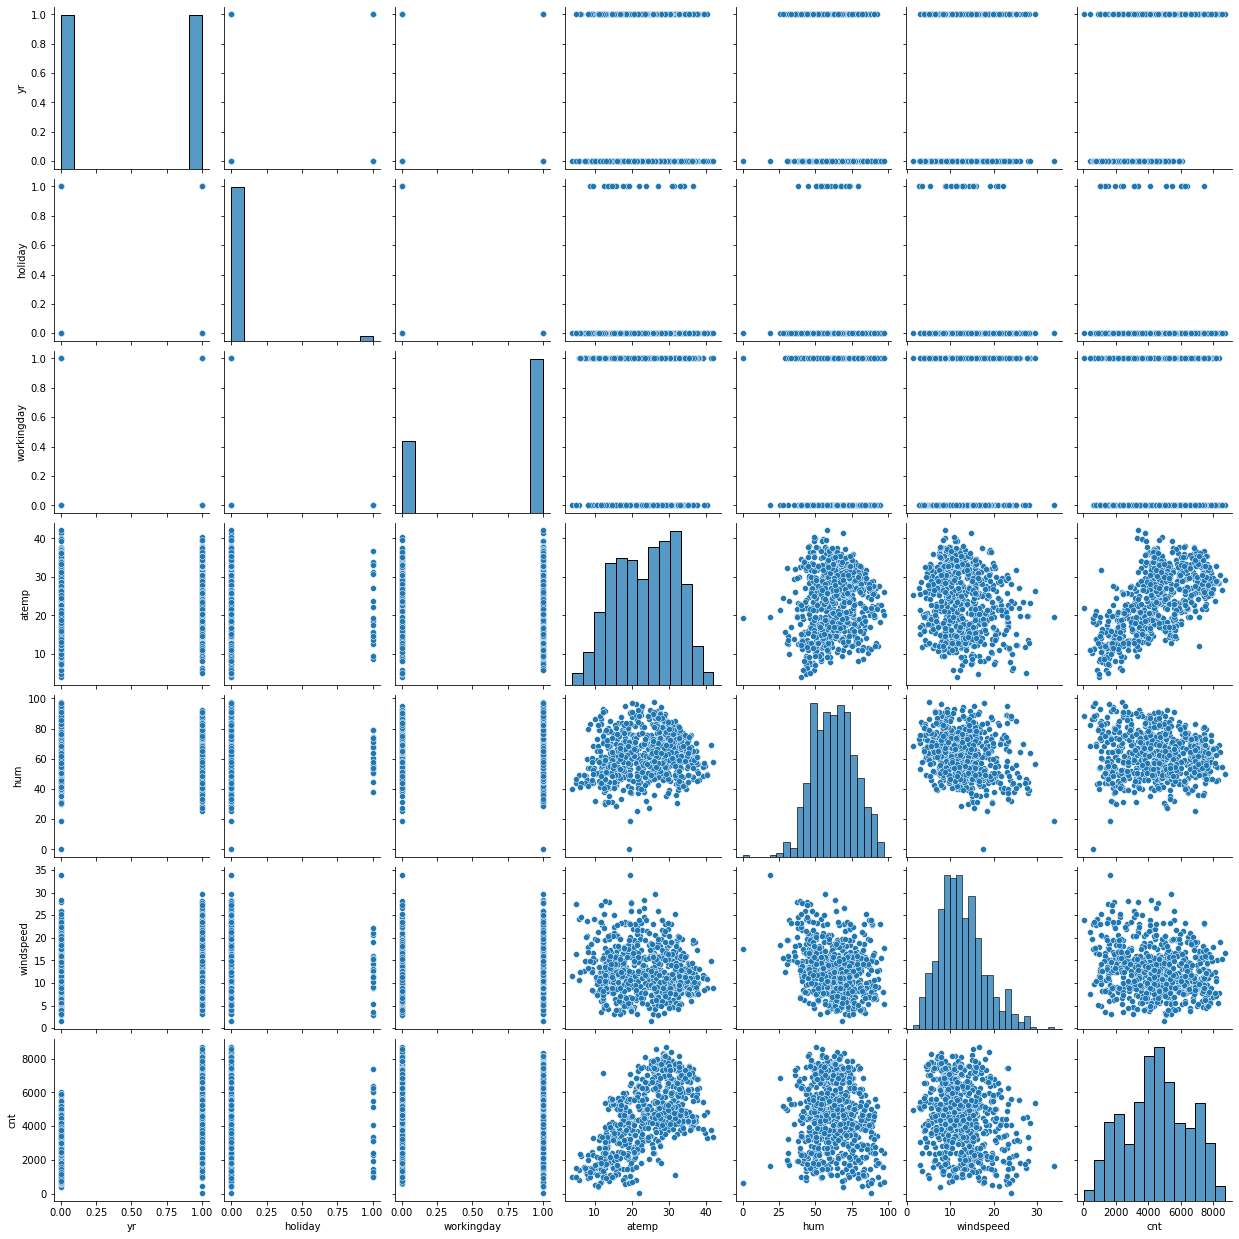

In [661]:
sns.pairplot(day_df)
plt.show()

### Based on above pairplot, "atemp" and "cnt" shows that linearity can be established between them

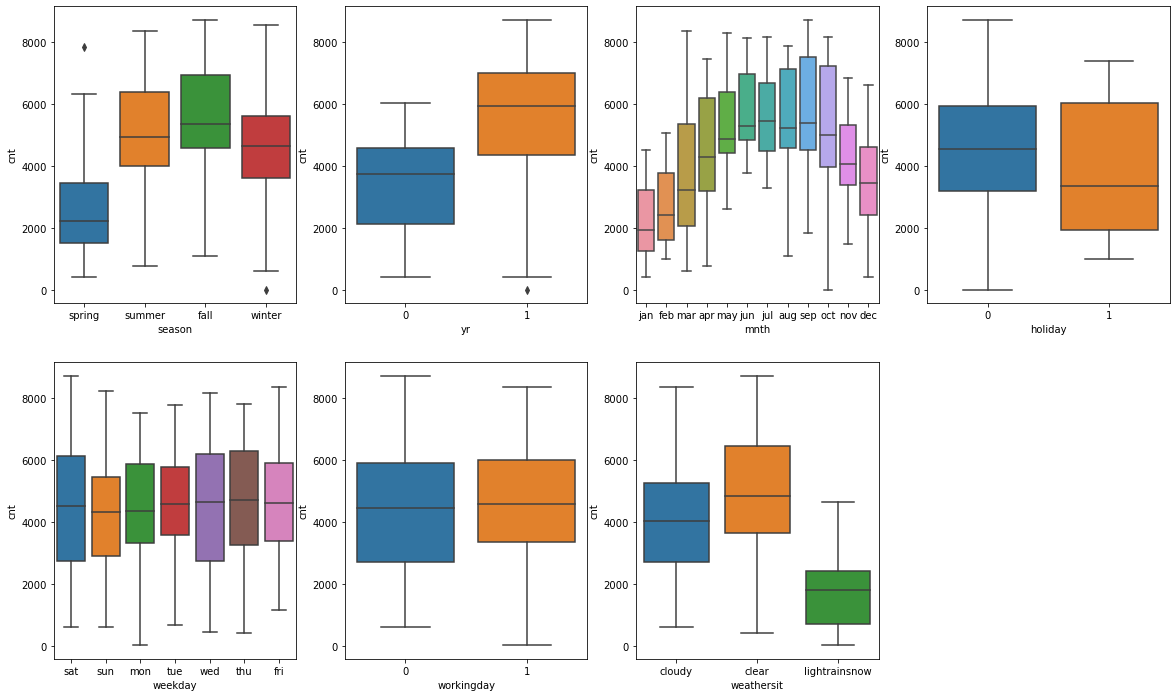

In [663]:
# bivariate analysis - categorical variables vs target variable "cnt"

plt.figure(figsize = (20, 12))

plt.subplot(2, 4, 1)
sns.boxplot(x = 'season', y = 'cnt', data = day_df)

plt.subplot(2, 4, 2)
sns.boxplot(x = 'yr', y = 'cnt', data = day_df)

plt.subplot(2, 4, 3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day_df)

plt.subplot(2, 4, 4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day_df)

plt.subplot(2, 4, 5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day_df)

plt.subplot(2, 4, 6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day_df)

plt.subplot(2, 4, 7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day_df)

plt.show()

### Observations based on above box plots
#### - There are no outliers
#### - There is no data present for extreme weather conditions
#### -	Summer and fall seasons have a greater number of users than other two seasons
#### -	User’s count was more in year 2019
#### -	User count decreases as the weather situation becomes worse  
#### -	Most number of user’s count was from May to October month


# 3. Data Preparation

### Doing one-hot encoding of season, month, weekday, and weather situation variables

#### Have not done the dummy encoding (not dropping the first variable from dummy variables) even though the data set can be represented after dropping one of the variable but at the same time impact of that variable on target variable will be missed hence I chose one-hot encoding

In [666]:
day_df = pd.get_dummies(data = day_df, columns = ['season', 'mnth', 'weekday', 'weathersit'])

In [667]:
day_df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_cloudy,weathersit_lightrainsnow
0,0,0,0,18.18125,80.5833,10.749882,985,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,1,0,...,0,0,0,0,0,0,1,1,0,0


In [668]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yr                        730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   atemp                     730 non-null    float64
 4   hum                       730 non-null    float64
 5   windspeed                 730 non-null    float64
 6   cnt                       730 non-null    int64  
 7   season_fall               730 non-null    uint8  
 8   season_spring             730 non-null    uint8  
 9   season_summer             730 non-null    uint8  
 10  season_winter             730 non-null    uint8  
 11  mnth_apr                  730 non-null    uint8  
 12  mnth_aug                  730 non-null    uint8  
 13  mnth_dec                  730 non-null    uint8  
 14  mnth_feb  

# 4. Splitting Data into Training and Test Data Sets

In [669]:
# import package
from sklearn.model_selection import train_test_split

In [670]:
# split train and test data
np.random.seed(0)
day_df_train, day_df_test = train_test_split(day_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [671]:
# import package
from sklearn.preprocessing import MinMaxScaler

In [672]:
scaler = MinMaxScaler()

In [673]:
# applying scaler function, except yes-no and dummy variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
day_df_train[num_vars] = scaler.fit_transform(day_df_train[num_vars])

<ipython-input-673-be6278a567a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df_train[num_vars] = scaler.fit_transform(day_df_train[num_vars])
C:\Users\varni\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [674]:
day_df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_cloudy,weathersit_lightrainsnow
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,0,0,1,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,1,0,0,...,0,0,0,0,0,1,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,1,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [675]:
day_df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_cloudy,weathersit_lightrainsnow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.262745,0.243137,0.245098,...,0.127451,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.440557,0.429398,0.430568,...,0.333805,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


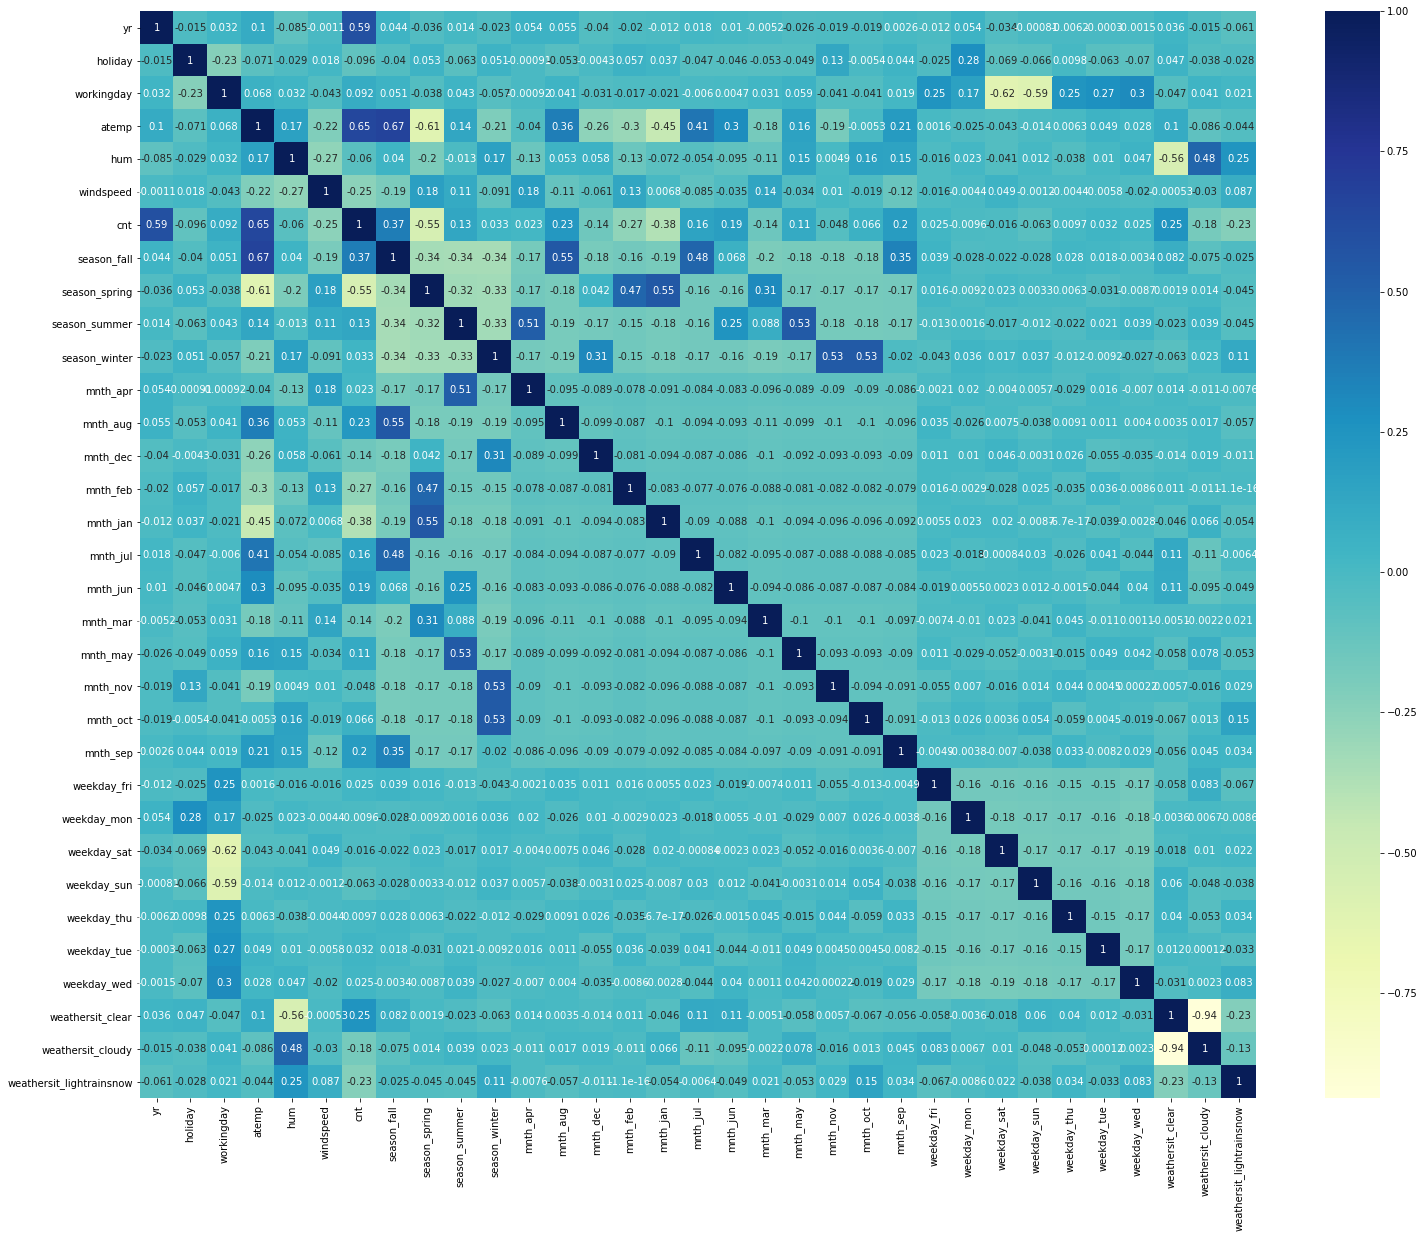

In [676]:
# checking which variables are highly correlated with "cnt"
plt.figure(figsize = (25, 20))
sns.heatmap(day_df_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

### It is difficult to read this heatmap but looks like "atemp", "season_fall", "yr", and "weathersit_clear" are highly correlated to "cnt"

In [678]:
# dividing the training data into independent and dependent variables
y_train = day_df_train.pop('cnt')
X_train = day_df_train

In [679]:
X_train.shape

(510, 32)

# 5. Building the Model

### I want to apply the top-down approach by adding all the variables but as the number of variables are little high (33) so I am going to take a mix approach (automated + manual) first, I will use automated method of feature selection (RFE) to identify top 20 variables which are workable for manual approach then I will use manual method to prepare the final model

In [681]:
# import packages (RFE and Linear Regression)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [682]:
# running RFE to get the top 20 variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

C:\Users\varni\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [683]:
# listing the variables along with their ranking to find out the top 20 variables
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_fall', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('mnth_apr', False, 11),
 ('mnth_aug', False, 2),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 3),
 ('mnth_mar', False, 12),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 9),
 ('mnth_sep', True, 1),
 ('weekday_fri', False, 7),
 ('weekday_mon', False, 5),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 4),
 ('weekday_thu', False, 10),
 ('weekday_tue', False, 6),
 ('weekday_wed', False, 13),
 ('weathersit_clear', True, 1),
 ('weathersit_cloudy', True, 1),
 ('weathersit_lightrainsnow', True, 1)]

In [684]:
# columns which are selected
col_selected = X_train.columns[rfe.support_]
print(col_selected)

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_fall', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_may', 'mnth_nov', 'mnth_sep',
       'weekday_sat', 'weathersit_clear', 'weathersit_cloudy',
       'weathersit_lightrainsnow'],
      dtype='object')


In [685]:
# columns which were not selected
col_n_selected = X_train.columns[~ rfe.support_]
print(col_n_selected)

Index(['season_summer', 'mnth_apr', 'mnth_aug', 'mnth_jun', 'mnth_mar',
       'mnth_oct', 'weekday_fri', 'weekday_mon', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')


### Applying manual approach for features selection and building the model

In [687]:
# creating X_train_rfe dataset with the variables suggested by automated feature selection approach (RFE)
X_train_rfe = X_train[col_selected]

In [688]:
# import package
import statsmodels.api as sm

In [689]:
# adding a constant
X_train_rfe_lm = sm.add_constant(X_train_rfe)
X_train_rfe_lm.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,season_fall,season_spring,season_winter,...,mnth_feb,mnth_jan,mnth_jul,mnth_may,mnth_nov,mnth_sep,weekday_sat,weathersit_clear,weathersit_cloudy,weathersit_lightrainsnow
653,1.0,1,0,1,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1.0,1,0,1,0.766351,0.725633,0.264686,1,0,0,...,0,0,1,0,0,0,0,1,0,0
426,1.0,1,0,0,0.438975,0.640189,0.255342,0,1,0,...,0,0,0,0,0,0,1,0,1,0
728,1.0,1,0,0,0.200348,0.498067,0.663106,0,1,0,...,0,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.391735,0.504508,0.188475,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [690]:
# fitting the model
lr = sm.OLS(y_train, X_train_rfe_lm).fit()

In [691]:
# checking the coefficients
lr.params

const                       0.171140
yr                          0.233180
holiday                    -0.044552
workingday                  0.044649
atemp                       0.438370
hum                        -0.150197
windspeed                  -0.170901
season_fall                -0.008411
season_spring              -0.086021
season_winter               0.073139
mnth_dec                   -0.057530
mnth_feb                   -0.040077
mnth_jan                   -0.071819
mnth_jul                   -0.052694
mnth_may                    0.029719
mnth_nov                   -0.053954
mnth_sep                    0.066596
weekday_sat                 0.055137
weathersit_clear            0.162038
weathersit_cloudy           0.101148
weathersit_lightrainsnow   -0.092046
dtype: float64

In [692]:
# checking the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.3
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          2.39e-187
Time:                        22:18:27   Log-Likelihood:                 520.99
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     490   BIC:                            -917.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Calculating VIF

In [694]:
# import package
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [695]:
# creating a dataframe having features and their VIFs
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
17,weathersit_clear,45.47
18,weathersit_cloudy,30.88
3,atemp,4.42
19,weathersit_lightrainsnow,4.11
7,season_spring,3.74
6,season_fall,3.39
8,season_winter,2.99
11,mnth_jan,2.36
4,hum,1.98
2,workingday,1.88


### Season_fall has the highest p value (0.610) but it's VIF is low (3.39) still dropping season_fall as per the rule (drop high p + low VIF combo before low p + high VIF) hence dropping this variable and rebuilding the model

In [697]:
X_train_rfe = X_train_rfe.drop(['season_fall'], axis = 1)

In [698]:
# adding a constant
X_train_rfe_lm = sm.add_constant(X_train_rfe)
X_train_rfe_lm.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_winter,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_may,mnth_nov,mnth_sep,weekday_sat,weathersit_clear,weathersit_cloudy,weathersit_lightrainsnow
653,1.0,1,0,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0,1,0,0
576,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0,1,0,0
426,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,1,0
728,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,1,0,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,0,0,1,0,1,0


In [699]:
# fitting the model
lr_1 = sm.OLS(y_train, X_train_rfe_lm).fit()

In [700]:
# checking the summary
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.6
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          2.17e-188
Time:                        22:18:27   Log-Likelihood:                 520.86
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     491   BIC:                            -923.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### There is no change in R-squared value and 0.001 increase in Adj. R-squared value which means dropping season_fall variable hasn't affect the model adversly

In [702]:
# let's check the VIF
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
16,weathersit_clear,45.39
17,weathersit_cloudy,30.85
18,weathersit_lightrainsnow,4.11
3,atemp,3.58
6,season_spring,3.54
7,season_winter,2.44
10,mnth_jan,2.29
4,hum,1.97
2,workingday,1.88
9,mnth_feb,1.83


### Holiday has the highest p value (0.103) but it's VIF is low (1.18) still dropping holiday as per the rule (drop high p + low VIF combo before low p + high VIF) hence dropping this variable and rebuilding the model

In [704]:
X_train_rfe = X_train_rfe.drop(['holiday'], axis = 1)
X_train_rfe.head()

,yr,workingday,atemp,hum,windspeed,season_spring,season_winter,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_may,mnth_nov,mnth_sep,weekday_sat,weathersit_clear,weathersit_cloudy,weathersit_lightrainsnow
653,1,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0,1,0,0
576,1,1,0.766351,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0,1,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,1,0
728,1,0,0.200348,0.498067,0.663106,1,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,0,0,1,0,1,0


In [705]:
# adding a constant
X_train_rfe_lm = sm.add_constant(X_train_rfe)
X_train_rfe_lm.head()

,const,yr,workingday,atemp,hum,windspeed,season_spring,season_winter,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_may,mnth_nov,mnth_sep,weekday_sat,weathersit_clear,weathersit_cloudy,weathersit_lightrainsnow
653,1.0,1,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0,1,0,0
576,1.0,1,1,0.766351,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0,1,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,1,0
728,1.0,1,0,0.200348,0.498067,0.663106,1,0,1,0,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,0,0,1,0,1,0


In [706]:
# fitting the model
lr_2 = sm.OLS(y_train, X_train_rfe_lm).fit()

In [707]:
# checking the summary
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.9
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          6.31e-189
Time:                        22:18:27   Log-Likelihood:                 519.47
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     492   BIC:                            -926.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### There is a slight decrease (0.001 and 0.001) in R-squared and Adj. R-squared values, dropping holiday hasn't impact the model adversly

In [709]:
# let's check the VIF
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
15,weathersit_clear,44.89
16,weathersit_cloudy,30.60
17,weathersit_lightrainsnow,4.09
2,atemp,3.57
5,season_spring,3.54
6,season_winter,2.44
9,mnth_jan,2.29
3,hum,1.97
8,mnth_feb,1.83
12,mnth_nov,1.71


### p value for mnth_feb is 0.045, which is close to 0.05, so dropping this variable

In [711]:
X_train_rfe = X_train_rfe.drop(['mnth_feb'], axis = 1)
X_train_rfe.head()

,yr,workingday,atemp,hum,windspeed,season_spring,season_winter,mnth_dec,mnth_jan,mnth_jul,mnth_may,mnth_nov,mnth_sep,weekday_sat,weathersit_clear,weathersit_cloudy,weathersit_lightrainsnow
653,1,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,1,0,0
576,1,1,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,0,1,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0,1,0
728,1,0,0.200348,0.498067,0.663106,1,0,1,0,0,0,0,0,0,1,0,0
482,1,0,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,0,1,0,1,0


In [712]:
# adding a constant
X_train_rfe_lm = sm.add_constant(X_train_rfe)
X_train_rfe_lm.head()

,const,yr,workingday,atemp,hum,windspeed,season_spring,season_winter,mnth_dec,mnth_jan,mnth_jul,mnth_may,mnth_nov,mnth_sep,weekday_sat,weathersit_clear,weathersit_cloudy,weathersit_lightrainsnow
653,1.0,1,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,1,0,0
576,1.0,1,1,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,0,1,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0,1,0
728,1.0,1,0,0.200348,0.498067,0.663106,1,0,1,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,0,1,0,1,0


In [713]:
# fitting the model
lr_3 = sm.OLS(y_train, X_train_rfe_lm).fit()

In [714]:
# checking the summary
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.7
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          3.52e-189
Time:                        22:18:27   Log-Likelihood:                 517.39
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     493   BIC:                            -928.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### R-squared and Adj. R-squared values are decreased by 0.001 which is not that high and this means dropping "mnth_feb" variable hasn't affect the model adversly

In [716]:
# let's check the VIF
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
14,weathersit_clear,43.83
15,weathersit_cloudy,30.04
16,weathersit_lightrainsnow,4.05
2,atemp,3.40
5,season_spring,2.82
6,season_winter,2.44
3,hum,1.97
11,mnth_nov,1.68
1,workingday,1.66
13,weekday_sat,1.65


### p value for mnth_may is 0.030, which is close to 0.05, so dropping this variable

In [718]:
X_train_rfe = X_train_rfe.drop(['mnth_may'], axis = 1)
X_train_rfe.head()

,yr,workingday,atemp,hum,windspeed,season_spring,season_winter,mnth_dec,mnth_jan,mnth_jul,mnth_nov,mnth_sep,weekday_sat,weathersit_clear,weathersit_cloudy,weathersit_lightrainsnow
653,1,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,1,0,0
576,1,1,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,1,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,1,0,1,0
728,1,0,0.200348,0.498067,0.663106,1,0,1,0,0,0,0,0,1,0,0
482,1,0,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,1,0,1,0


In [719]:
# adding a constant
X_train_rfe_lm = sm.add_constant(X_train_rfe)
X_train_rfe_lm.head()

,const,yr,workingday,atemp,hum,windspeed,season_spring,season_winter,mnth_dec,mnth_jan,mnth_jul,mnth_nov,mnth_sep,weekday_sat,weathersit_clear,weathersit_cloudy,weathersit_lightrainsnow
653,1.0,1,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,1,0,0
576,1.0,1,1,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,1,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,1,0,1,0
728,1.0,1,0,0.200348,0.498067,0.663106,1,0,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,1,0,1,0


In [720]:
# fitting the model
lr_4 = sm.OLS(y_train, X_train_rfe_lm).fit()

In [721]:
# checking the summary
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.4
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          2.71e-189
Time:                        22:18:27   Log-Likelihood:                 514.94
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     494   BIC:                            -930.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### R-squared and Adj. R-squared values are decreased by 0.001 which is not that high and this means dropping "mnth_may" variable hasn't affect the model adversly

In [723]:
# let's check the VIF
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
13,weathersit_clear,43.81
14,weathersit_cloudy,30.04
15,weathersit_lightrainsnow,4.04
2,atemp,3.40
5,season_spring,2.68
6,season_winter,2.30
3,hum,1.92
10,mnth_nov,1.68
1,workingday,1.66
8,mnth_jan,1.65


### Highest VIF is for weathersit_clear which is 43.81 > 5, hence dropping this variable

In [725]:
X_train_rfe = X_train_rfe.drop(['weathersit_clear'], axis = 1)
X_train_rfe.head()

,yr,workingday,atemp,hum,windspeed,season_spring,season_winter,mnth_dec,mnth_jan,mnth_jul,mnth_nov,mnth_sep,weekday_sat,weathersit_cloudy,weathersit_lightrainsnow
653,1,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,1,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,1,1,0
728,1,0,0.200348,0.498067,0.663106,1,0,1,0,0,0,0,0,0,0
482,1,0,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,1,1,0


In [726]:
# adding a constant
X_train_rfe_lm = sm.add_constant(X_train_rfe)
X_train_rfe_lm.head()

,const,yr,workingday,atemp,hum,windspeed,season_spring,season_winter,mnth_dec,mnth_jan,mnth_jul,mnth_nov,mnth_sep,weekday_sat,weathersit_cloudy,weathersit_lightrainsnow
653,1.0,1,1,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1.0,1,1,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,1,1,0
728,1.0,1,0,0.200348,0.498067,0.663106,1,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,1,1,0


In [727]:
# fitting the model
lr_5 = sm.OLS(y_train, X_train_rfe_lm).fit()

In [728]:
# checking the summary
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.4
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          2.71e-189
Time:                        22:18:27   Log-Likelihood:                 514.94
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     494   BIC:                            -930.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### There is no change in R-squared and Adj. R-squared values which means dropping weathersit_clear variable hasn't affect the model adversly

In [730]:
# let's check the VIF
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,hum,25.65
2,atemp,17.69
1,workingday,4.67
4,windspeed,4.12
6,season_winter,2.93
5,season_spring,2.92
13,weathersit_cloudy,2.26
0,yr,2.07
12,weekday_sat,1.83
10,mnth_nov,1.80


### Highest VIF is for "hum" which is 25.65 > 5, hence dropping this variable

In [732]:
X_train_rfe = X_train_rfe.drop(['hum'], axis = 1)
X_train_rfe.head()

,yr,workingday,atemp,windspeed,season_spring,season_winter,mnth_dec,mnth_jan,mnth_jul,mnth_nov,mnth_sep,weekday_sat,weathersit_cloudy,weathersit_lightrainsnow
653,1,1,0.501133,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,1,0.766351,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0,0.438975,0.255342,1,0,0,0,0,0,0,1,1,0
728,1,0,0.200348,0.663106,1,0,1,0,0,0,0,0,0,0
482,1,0,0.391735,0.188475,0,0,0,0,0,0,0,1,1,0


In [733]:
# adding a constant
X_train_rfe_lm = sm.add_constant(X_train_rfe)
X_train_rfe_lm.head()

,const,yr,workingday,atemp,windspeed,season_spring,season_winter,mnth_dec,mnth_jan,mnth_jul,mnth_nov,mnth_sep,weekday_sat,weathersit_cloudy,weathersit_lightrainsnow
653,1.0,1,1,0.501133,0.300794,0,1,0,0,0,0,0,0,0,0
576,1.0,1,1,0.766351,0.264686,0,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.438975,0.255342,1,0,0,0,0,0,0,1,1,0
728,1.0,1,0,0.200348,0.663106,1,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0.391735,0.188475,0,0,0,0,0,0,0,1,1,0


In [734]:
# fitting the model
lr_6 = sm.OLS(y_train, X_train_rfe_lm).fit()

In [735]:
# checking the summary
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.7
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          1.25e-187
Time:                        22:18:28   Log-Likelihood:                 508.22
No. Observations:                 510   AIC:                            -986.4
Df Residuals:                     495   BIC:                            -922.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### R-squared and Adj. R-squared values are decreased by 0.004 which is not that high and this means dropping "hum" variable hasn't affect the model adversly

In [737]:
# let's check the VIF
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
2,atemp,6.60
1,workingday,4.57
3,windspeed,4.09
5,season_winter,2.57
4,season_spring,2.43
0,yr,2.06
11,weekday_sat,1.82
9,mnth_nov,1.77
7,mnth_jan,1.67
12,weathersit_cloudy,1.56


### "atemp" VIF is 6.60 which is greater than 5 but if "atemp" is dropped then R-squared and Adj. R-squared values decreased by almost 5% and initially with pairplot a linear relationship was observed between "atemp" and "cnt" hence not dropping this variable

### This can be considered the final model now R-squared is 84.2% and Adj. R-squared 83.7% which is good Prob (F-statistic) is almost 0, hence overall model is significant

# 6. Residual Analysis of Training Data

In [742]:
# residual analysis of the train data and validating assumption of linear regression
y_train_pred = lr_6.predict(X_train_rfe_lm)

C:\Users\varni\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


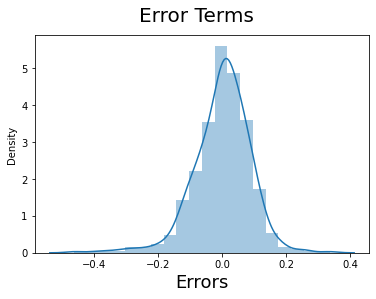

In [745]:
# plotting the error terms for validating assumption of linear regression
fig = plt.figure()

sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

plt.show()

### Error terms are normally distributed and mean is 0 which validates two of linear regression assumptions

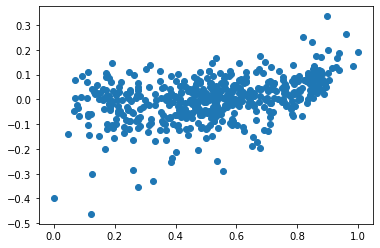

In [747]:
plt.scatter(y_train, (y_train - y_train_pred))
plt.show()

### Error terms look independent which validates another assumption of linear regression

# 7. Making Predictions using the Final Model

In [754]:
# scaling the test set
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
day_df_test[num_vars] = scaler.transform(day_df_test[num_vars])

<ipython-input-754-2b15d5228e5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df_test[num_vars] = scaler.transform(day_df_test[num_vars])
C:\Users\varni\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [755]:
day_df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_cloudy,weathersit_lightrainsnow
184,0,1,0,0.769660,0.657364,0.084219,0.692706,1,0,0,...,0,1,0,0,0,0,0,0,1,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,0,1,...,0,0,0,0,0,0,1,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,0,...,0,0,0,0,1,0,0,0,1,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,0,0,1,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [756]:
day_df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_clear,weathersit_cloudy,weathersit_lightrainsnow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,0.520592,0.246575,0.255708,0.264840,...,0.178082,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.652968,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,0.218435,0.432005,0.437258,0.442259,...,0.383458,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.477117,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [757]:
# creating X_test and y_test
y_test = day_df_test.pop('cnt')
X_test = day_df_test

In [759]:
# dropping variables from X_test
X_test_lr_6 = X_test[X_train_rfe.columns]

In [761]:
# adding constant
X_test_lr_6 = sm.add_constant(X_test_lr_6)

In [763]:
# making predictions
y_test_pred = lr_6.predict(X_test_lr_6)

# 8. Model Evaluation

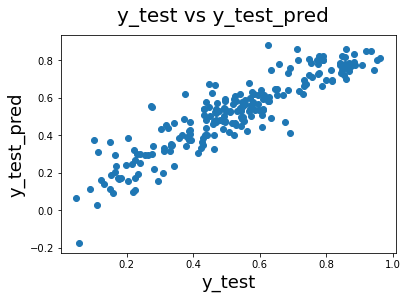

In [766]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 18)
plt.show()

In [767]:
# import package
from sklearn.metrics import r2_score

In [776]:
# R-squared value on test set
r2 = r2_score(y_test, y_test_pred)
print(r2)

0.8215432161133716


In [774]:
# Adj. R-dquared value on test set
1-(1-r2)*((219-1)/(219-14-1))

0.8092961819250735

### R-squared is 82.15% and Adj. R-squared is 80.93% on test set which is close to training data set values

# 9. Model Equation and Inferences

### Equation for the model
### cnt = 0.24*yr + 0.05*workingday + 0.41*atemp - 0.14*windspeed - 0.11*season_spring + 0.06*season_winter - 0.06*mnth_dec - 0.06*mnth_jan - 0.06*mnth_jul - 0.05*mnth_nov + 0.05*mnth_sep + 0.07*weekday_sat - 0.08*weathersit_cloudy - 0.30*weathersit_lightrainsnow + 0.25

### Some inferences based on the fact that if all the independent variables are kept constant except one
#### - 24% increase in count in 2019
#### - 41% increase in count with increase (by one unit) in temperature felt by users
#### - 14% decrease in count with increase in windspeed (by one unit)
#### - 11% decrease in count in spring season
#### - 6% increase in count in winter season